In [1]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
# Handwriting, from Homework 6
def extract_data(filename):
  data = []
  with open(filename) as f:
    for line in f:
      cols = line.split()
      if len(cols) < 256: # Bad data
        continue
      digit = int(float(cols[0]))
      if digit == 1 or digit == 5:
        data.append((digit, np.reshape([float(pixel) for pixel in cols[1:]], (-1, 16))))
  return data

trainData = extract_data('/content/drive/MyDrive/handwriting/ZipDigits.train')
testData = extract_data('/content/drive/MyDrive/handwriting/ZipDigits.test')

In [3]:
# Features from homework 6
# Nomalized by divided 16 * 16 = 256
def symmetry(image):
  res = 0.0
        
  for i in range(8):
      for j in range(16):
          res += abs(image[i][j]-image[15-i][j])
  return res / 256

def intensity(image):
  return np.sum(image) / 256

In [4]:
# First, label the data
# Label 1 as 1, 5 as -1

def label_data(data, feature1, feature2):
  labeledData = []
  res = []
  for (num, img) in data:
    if num == 1:
      labeledData.append([feature1(img), feature2(img)])
      res.append(1)
    else:
      labeledData.append([feature1(img), feature2(img)])
      res.append(-1)
  return labeledData, res

labeldTrainData = label_data(trainData, intensity, symmetry)
labeldTestData = label_data(testData, intensity, symmetry)

print("Label: {}, Res: {}".format(labeldTestData[0][0], labeldTestData[1][0]))

Label: [-0.6801328124999999, 0.06171875], Res: 1


In [5]:
# From homework 6
def linear_regression(x, res):
  X = [[1] + p for p in x]
  Y = res
  
  XT = np.transpose(X)
  XTX = np.dot(XT, X)
  XTX_inv = np.linalg.inv(XTX)
  XTX_invXT = np.dot(XTX_inv, XT)
  Wlin = np.dot(XTX_invXT, Y)
  
  return Wlin
  
# From homework 1
def run_pla_once(p, resy, weights):
  start = np.array(weights)

  for i in range(len(resy)):
    x = np.array([1] + p[i])
    if np.dot(start, x) * resy[i] <= 0:
      start += resy[i] * x
      break

  return start

def calc_acc(weights, data, get_num = False):
  correct = 0
  labeld, res = data
  for idx, val in enumerate(labeld):
      if np.dot(weights, [1] + val) * res[idx] > 0:
          correct += 1
  if get_num:
    return float(correct) / len(labeld), correct

  return float(correct) / len(labeld)

def pocket(data, weights, max_iteration = 10000):
  best_accuracy = 0
  best_weights = weights
  labeld, res = data
  
  iteration = 0
  while iteration < max_iteration:
    weights = run_pla_once(labeld, res, weights)
    acc = calc_acc(weights, data)
    if acc > best_accuracy:
      best_weights = weights
      best_accuracy = acc
    iteration += 1
  
  return best_weights

In [6]:
# From homework 6
def plot_features(data):    
  fig, axs = plt.subplots(1)
  in_res_1 = []
  sym_res_1 = []
  in_res_5 = []
  sym_res_5 = []
  for num, img in data:
    if num == 1:
      in_res_1.append(intensity(img))
      sym_res_1.append(symmetry(img))
    elif num == 5:
      in_res_5.append(intensity(img))
      sym_res_5.append(symmetry(img))
  
  axs.plot(in_res_1, sym_res_1, 'bo', label="1")
  axs.plot(in_res_5, sym_res_5, 'rx', label="5")
  axs.set_xlabel("Intensity")
  axs.set_ylabel("Symmetry(horizonal)")

  return fig, axs

In [7]:
# Question 1.1
# Linear then pocket, apply graph
def get_seps(data):
  trainWlin = linear_regression(data[0], data[1])
  print("Train Linear Regession result: {}".format(trainWlin))

  # Pocket!
  trainW = pocket(data, trainWlin, 10000) 

  return trainW

trainW = get_seps(labeldTrainData)
print("Result: {}".format(trainW))

Train Linear Regession result: [ 1.56574851  0.55713934 -6.86254793]
Result: [  1.56574851  -0.60127863 -11.76616121]


In [8]:
calcz = lambda x1, x2, r : r[0] + r[1] * x1 + r[2] * x2
# Line range, just make it longer than the max x
x1_params = np.linspace(-1,0.3) # Intensity range
x2_params = np.linspace(0,0.6)  # Symmetry range
levels = [0] # For contour, we only need first one
x1, x2 = np.meshgrid(x1_params,x2_params)
print(x1)
print(x2)

[[-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]
 [-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]
 [-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]
 ...
 [-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]
 [-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]
 [-1.         -0.97346939 -0.94693878 ...  0.24693878  0.27346939
   0.3       ]]
[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.0122449 0.0122449 0.0122449 ... 0.0122449 0.0122449 0.0122449]
 [0.0244898 0.0244898 0.0244898 ... 0.0244898 0.0244898 0.0244898]
 ...
 [0.5755102 0.5755102 0.5755102 ... 0.5755102 0.5755102 0.5755102]
 [0.5877551 0.5877551 0.5877551 ... 0.5877551 0.5877551 0.5877551]
 [0.6       0.6       0.6       ... 0.6       0.6       0.6      ]]


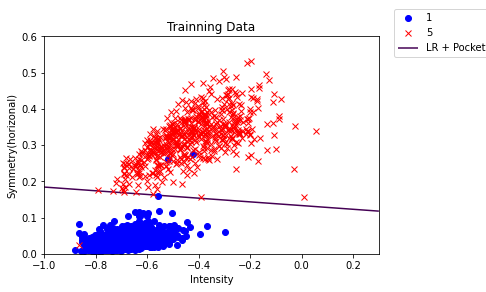

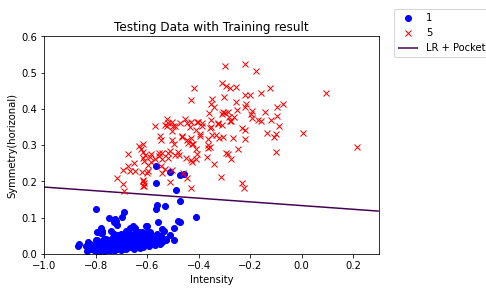

In [9]:
def draw_seps(trainW):
  fig1, axs1 = plot_features(trainData)
  cs1 = axs1.contour(x1, x2, calcz(x1, x2, trainW), levels = levels)
  cs1.collections[0].set_label("LR + Pocket") # set first level line
  axs1.set_title("Trainning Data")

  fig2, axs2 = plot_features(testData)
  cs2 = axs2.contour(x1, x2, calcz(x1, x2, trainW), levels = levels)
  cs2.collections[0].set_label("LR + Pocket")
  axs2.set_title("Testing Data with Training result")
  fig1.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
  fig2.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
  
draw_seps(trainW)

In [10]:
# Question 1.2 Error Calculation
print("E_in: {}, E_test: {}".format(1 - calc_acc(trainW, labeldTrainData), 1 - calc_acc(trainW, labeldTestData)))

E_in: 0.0019218449711723151, E_test: 0.014150943396226467


In [11]:
# Question 1.3 Bound
print("# of training set: {}, # of test set: {}".format(len(labeldTrainData[0]), len(labeldTestData[0])))

# of training set: 1561, # of test set: 424


In [12]:
# Question 1.4 Third order
# Incomming data has two features

def third_order_transform(data):
  labeld, res = data
  transformed = []

  for x1, x2 in labeld:
      transformed.append([
                          x1,
                          x2,
                          x1**2,
                          x2**2,
                          x1*x2,
                          x1**3,
                          x2**3,
                          x1**2*x2,
                          x1*x2**2
                        ])

  return transformed, res

transformedTrainData = third_order_transform(labeldTrainData)
transformedTestData = third_order_transform(labeldTestData)

In [13]:
transformedTrainW = get_seps(transformedTrainData)

print("Transformed: {}".format(transformedTrainW))

Train Linear Regession result: [ -1.40311888  -9.54524919  12.90654246 -11.00869527 -65.20808181
  36.44353103  -3.86346031  83.11501338  15.14255116 -43.82075212]
Transformed: [ -1.40311888 -10.04013591  10.68221824 -10.45584984 -65.66903287
  37.86649024  -4.42768072  83.06835657  14.18259635 -43.51570364]


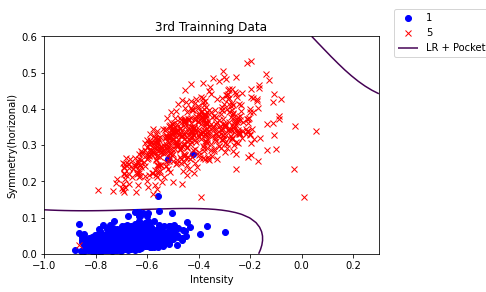

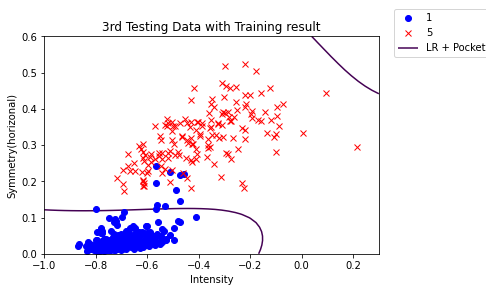

In [14]:
calc_3rd_z = lambda x1, x2, r: r[0] + r[1]*x1 + r[2]*x2 + r[3]*x1**2 + r[4]*x2**2 + r[5]*x1*x2 + r[6]*x1**3 + r[7]*x2**3 + r[8]*x1**2*x2 + r[8]*x1*x2**2

def draw_3rd_seps(trainW):
  fig1, axs1 = plot_features(trainData)
  cs1 = axs1.contour(x1, x2, calc_3rd_z(x1, x2, trainW), levels = levels)
  cs1.collections[0].set_label("LR + Pocket") # set first level line
  axs1.set_title("3rd Trainning Data")

  fig2, axs2 = plot_features(testData)
  cs2 = axs2.contour(x1, x2, calc_3rd_z(x1, x2, trainW), levels = levels)
  cs2.collections[0].set_label("LR + Pocket")
  axs2.set_title("3rd Testing Data with Training result")
  fig1.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
  fig2.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
  
draw_3rd_seps(transformedTrainW)

In [15]:
print("For 3rd, E_in: {}, E_test: {}".format(1 - calc_acc(transformedTrainW, transformedTrainData ), 1 - calc_acc(transformedTrainW, transformedTestData)))

For 3rd, E_in: 0.002562459961563124, E_test: 0.014150943396226467


In [47]:
# Question 2
func = lambda x, y: x**2 + 2 * y**2 + 2 * np.sin(2 * np.pi * x) * np.sin(2 * np.pi * y)
x_t_func = lambda x_t, y_t, eta: x_t - eta * (2 * x_t + 4 * np.pi * np.cos(2 * np.pi * x_t)* np.sin(2 * np.pi * y_t))
y_t_func = lambda x_t, y_t, eta: y_t - eta * (4 * y_t + 4 * np.pi * np.sin(2 * np.pi * x_t)* np.cos(2 * np.pi * y_t)) 

def gradient_descent(x_t = 0.1, y_t = 0.1, eta = 0.01, num_iterations = 50):
  costs = []
  x_ts = []
  y_ts = []
  for i in range(num_iterations):
      x_t, y_t = x_t_func(x_t, y_t, eta), y_t_func(x_t, y_t, eta)
      costs.append(func(x_t, y_t))
      x_ts.append(x_t)
      y_ts.append(y_t)

  return np.arange(0, num_iterations, 1), costs, x_ts, y_ts

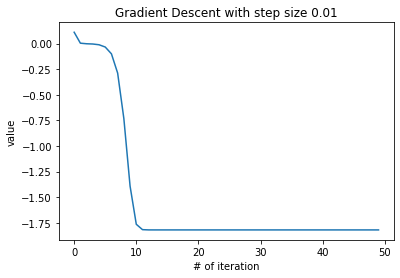

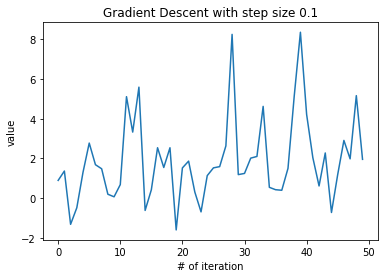

In [48]:
def draw_gradient_descent(axis, costs):
  fig, axs = plt.subplots(1)
  axs.plot(axis, costs)
  axs.set_xlabel('# of iteration')
  axs.set_ylabel('value')
  return fig, axs

iterations1, costs1, _, _ = gradient_descent()
fig1, axs1 = draw_gradient_descent(iterations1, costs1)
axs1.set_title("Gradient Descent with step size 0.01")
iterations2, costs2, _, _ = gradient_descent(eta=0.1)
fig2, axs2 = draw_gradient_descent(iterations2, costs2)
axs2.set_title("Gradient Descent with step size 0.1")
fig1.show()
fig2.show()

In [55]:
initial_points = [(0.1, 0.1), (1, 1), (-0.5, -0.5), (-1, -1)]
etas = [0.1, 0.01]

cols = ["Initial Point", "eta", "x", "y", "Minimum Value"]
print("{:<15}{:<15}{:<15}{:<15}{:<15}".format(*cols))
row_format = "{:<15}{:<15}{:<15.4f}{:<15.4f}{:<15.4f}"
for (x_t, y_t) in initial_points:
  for eta in etas:
    iterations, costs, x_t_res, y_t_res = gradient_descent(x_t, y_t, eta)
    min_cost = min(costs)
    idx = costs.index(min_cost)
    print(row_format.format("{}".format((x_t, y_t)), eta, x_t_res[idx], y_t_res[idx], min_cost))


Initial Point  eta            x              y              Minimum Value  
(0.1, 0.1)     0.1            0.2065         -0.1715        -1.5949        
(0.1, 0.1)     0.01           0.2438         -0.2379        -1.8201        
(1, 1)         0.1            0.1974         -0.2668        -1.6998        
(1, 1)         0.01           1.2181         0.7128         0.5933         
(-0.5, -0.5)   0.1            0.2863         -0.3315        -1.3965        
(-0.5, -0.5)   0.01           -0.7314        -0.2379        -1.3325        
(-1, -1)       0.1            -0.1974        0.2668         -1.6998        
(-1, -1)       0.01           -1.2181        -0.7128        0.5933         
